In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Data Ingestion:

In [65]:
# reading the data
df = pd.read_csv('online_shoppers_intention_given.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [66]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [67]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [68]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [69]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [70]:
#shape of the dataset
df.shape

(12330, 18)

The total number of columns are 18 and rows are 12330

In [71]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [72]:
#checking the Null values in the data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are no Null values in the dataset

In [73]:
#cehcking the attributes of dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


There are 8 categorical columns out of which 4 are of object type so we need to perform label encoding on that column and then do further analysis

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Weekend'])

In [75]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,1


For revenue column 0: False 1: True






# 2.  Kmeans:

In [76]:
X = df.drop('Revenue', axis =1 )

In [77]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [80]:
#Applying standardscaler to the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:
#Table of num clusters vs errors
from sklearn.cluster import KMeans
cluster_errors = []
cluster_range = range(1,20)
for num_clusters in cluster_range:
    model = KMeans(num_clusters)
    model.fit(X)
    cluster_errors.append([num_clusters,model.inertia_])
cluster_errors

[[1, 209610.0],
 [2, 185774.35427881154],
 [3, 166000.21152281185],
 [4, 155892.06010401857],
 [5, 145654.31781567528],
 [6, 137315.01450457965],
 [7, 130843.75236756106],
 [8, 124340.0726170087],
 [9, 118990.29309863273],
 [10, 114268.31402710076],
 [11, 109107.4553716236],
 [12, 104777.7642631234],
 [13, 102225.22197233043],
 [14, 99845.94350352863],
 [15, 96538.699340907],
 [16, 94305.53768076179],
 [17, 91185.87752101694],
 [18, 89190.71365372461],
 [19, 87304.0613088767]]

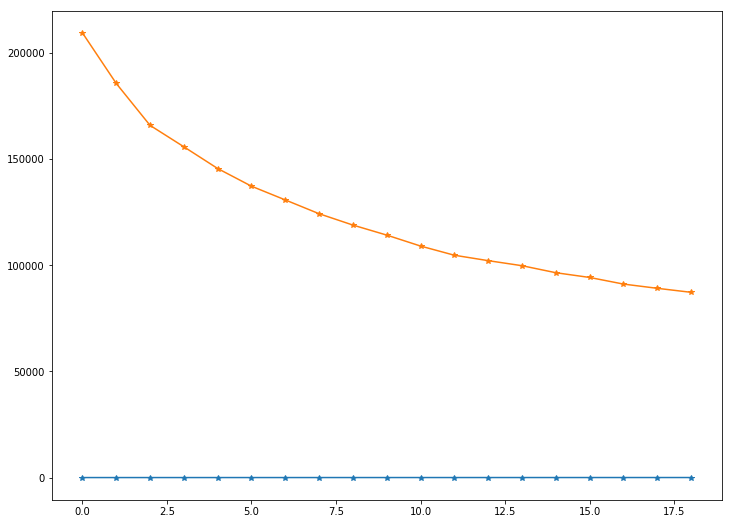

In [84]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12,9))
plt.plot(cluster_errors,marker =  "*")

Number of clusters optimum for this clustering would be 3 as the decrease in the slope of line after 3rd point is constant

# 3.  Hierarchical:

In [91]:
#using affinity  = euclidean and linkage = ward for n clusters = 3
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [92]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [93]:
L = pd.DataFrame(model2.labels_)
L[0].value_counts()

0    10906
1      783
2      641
Name: 0, dtype: int64

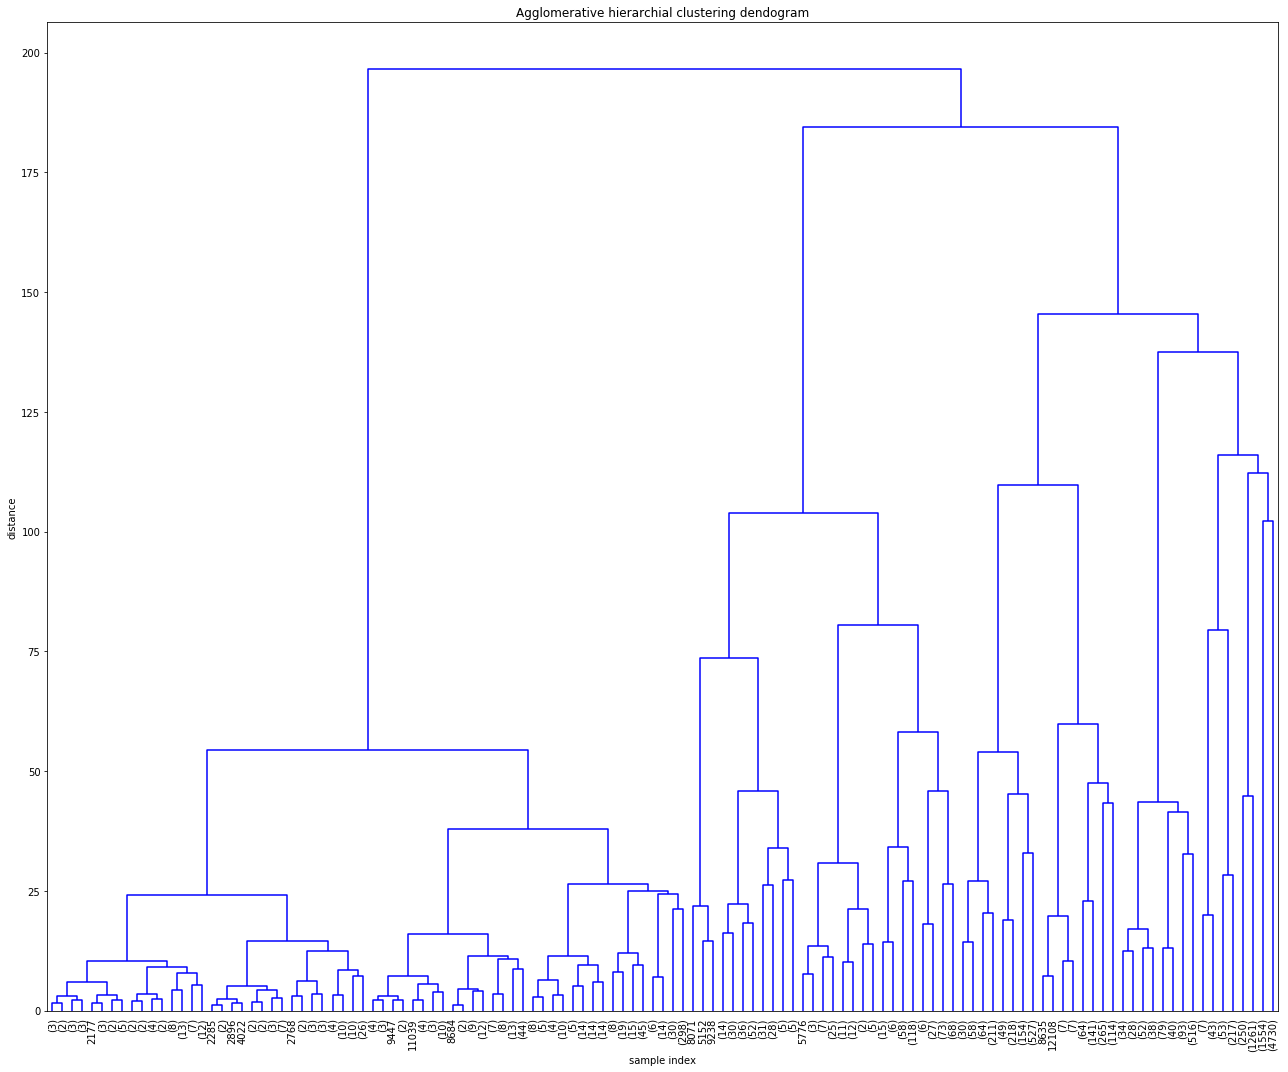

In [105]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize = (18,15))
plt.title('Agglomerative hierarchial clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(X,'ward')
dendrogram(z, p = 6, color_threshold = 1, leaf_font_size = 10 , truncate_mode = 'level')
plt.tight_layout()

In [94]:
model2.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')>

In [98]:
#using affinity  = euclidean and linkage = average for n clusters = 3
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model2.fit(X)
L = pd.DataFrame(model2.labels_)
L[0].value_counts()

0    12327
1        2
2        1
Name: 0, dtype: int64

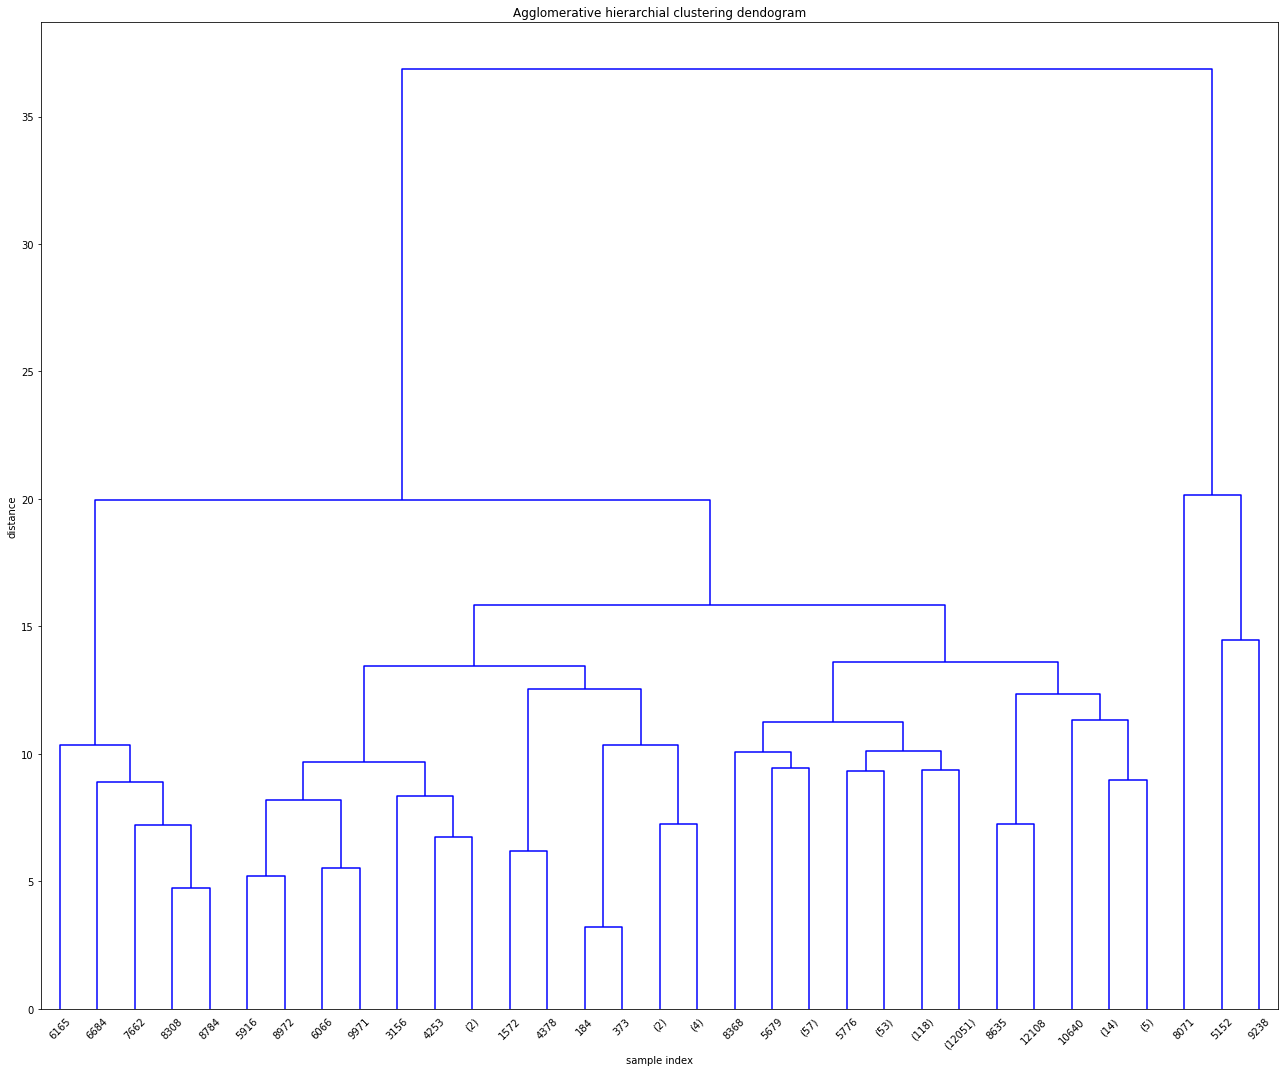

In [101]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize = (18,15))
plt.title('Agglomerative hierarchial clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(X,'average')
dendrogram(z, p = 6, color_threshold = 1, leaf_font_size = 10 , truncate_mode = 'level')
plt.tight_layout()

for affinity = euclidean and linkage  = ward model is giving better clustering results

In [100]:
#using affinity  = cosine and linkage = average for n clusters = 3
model2 = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
model2.fit(X)
L = pd.DataFrame(model2.labels_)
L[0].value_counts()

1    6819
0    3028
2    2483
Name: 0, dtype: int64

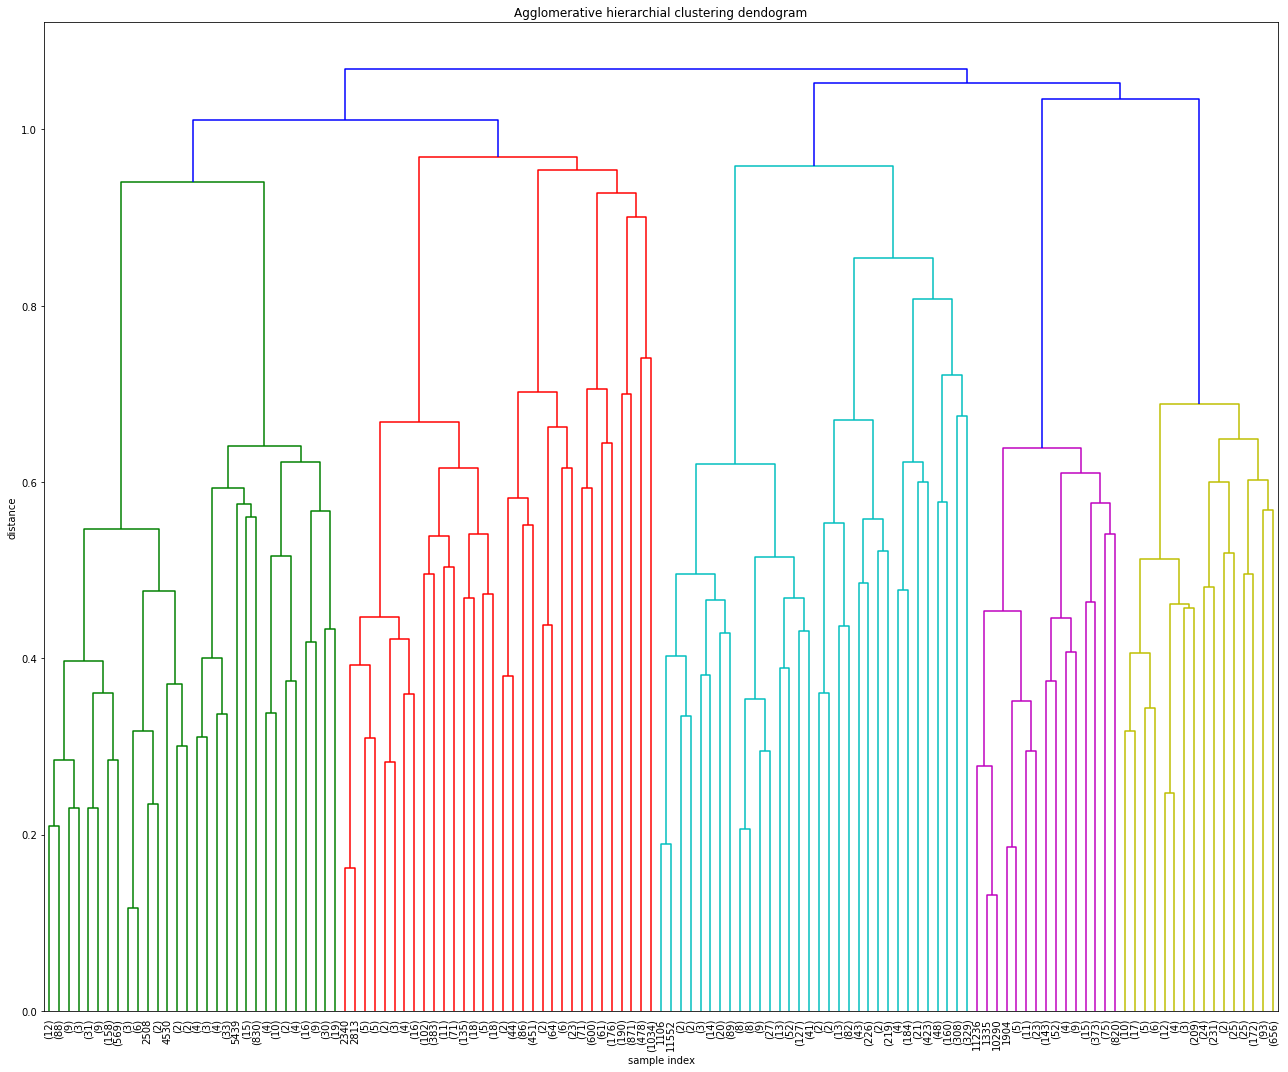

In [103]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize = (18,15))
plt.title('Agglomerative hierarchial clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(X,metric='cosine',method = 'average')
dendrogram(z, p = 6, color_threshold = 1, leaf_font_size = 10 , truncate_mode = 'level')
plt.tight_layout()

The best performing model for n_clusters = 3 is model with affinity  = 'euclidean' and linkage = 'ward' as it has classified them correctly further we can see in the dendogram of the same model that the group0 and group2 are hierarchial and group 0 is another group. So let us check for n_cluster = 2 with linkage = 'euclidean', affinity = 'ward'

In [106]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model2.fit(X)
L = pd.DataFrame(model2.labels_)
L[0].value_counts()


0    11547
1      783
Name: 0, dtype: int64

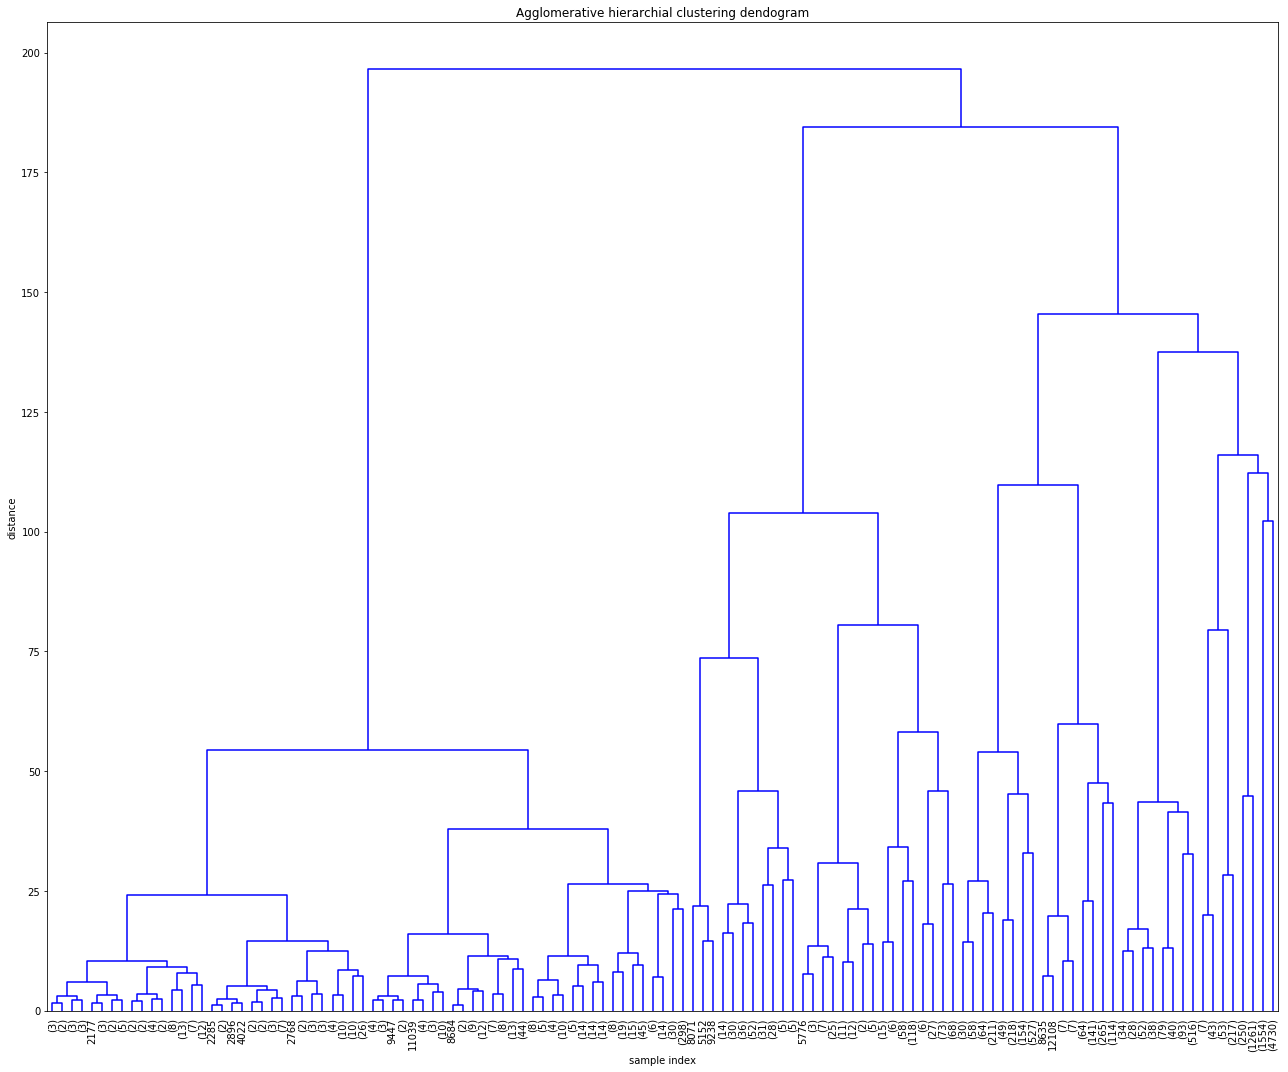

In [107]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize = (18,15))
plt.title('Agglomerative hierarchial clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(X,'ward')
dendrogram(z, p = 6, color_threshold = 1, leaf_font_size = 10 , truncate_mode = 'level')
plt.tight_layout()

# 4. Convert Unsupervised data into Supervised data:

In [113]:
df['label'] = L 

In [114]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,1,0


In [115]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(df['Revenue'],df['label']))
print(confusion_matrix(df['Revenue'],df['label']))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      9462
           1       0.17      0.05      0.07      2868

   micro avg       0.73      0.73      0.73     12330
   macro avg       0.47      0.49      0.46     12330
weighted avg       0.62      0.73      0.66     12330

[[8810  652]
 [2737  131]]


1. The clustering algorithm is clustering the 0th group,i.e the false group pretty correctly.
2. The alpha error is quite high.



# 5. PCA :

In [118]:
#Because pca can only be applied on numerical columns so applying pca on numerical columns
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

In [119]:
#applying standard scaler on the data
X = sc.fit_transform(X)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 'mle')
X_pca = pd.DataFrame(pca.fit_transform(X))

total = sum(pca.explained_variance_)
var_exp = [(i/total)*100 for i in sorted(pca.explained_variance_, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 34.26980097,  51.15264308,  61.9493618 ,  72.13602614,
        81.62041636,  90.96413231,  95.21735264,  98.76152246,
       100.        ])

So total of 7 features make the variance more than 95 so taking 7 features

In [179]:
pca = PCA(n_components = 7)
X_pca = pd.DataFrame(pca.fit_transform(X))



Kmeans Clustering

In [180]:
cluster_errors = []
cluster_range = range(1,15)
for num_clusters in cluster_range:
    model = KMeans(num_clusters)
    model.fit(X_pca)
    cluster_errors.append([num_clusters,model.inertia_])
cluster_errors

[[1, 454026.9047308091],
 [2, 294005.1059240977],
 [3, 246912.14485710635],
 [4, 211546.73997185315],
 [5, 193674.62750501657],
 [6, 181386.9701145981],
 [7, 169750.76136775484],
 [8, 158454.20109090235],
 [9, 149689.67571239398],
 [10, 139619.07632100416],
 [11, 132708.8765025065],
 [12, 127842.41801963521],
 [13, 120210.55071636938],
 [14, 115837.01784023267]]

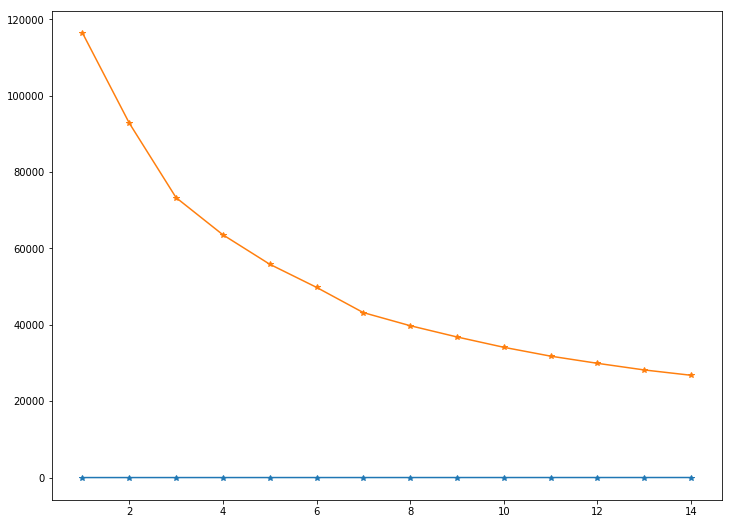

In [124]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12,9))
plt.plot(cluster_range,cluster_errors,marker =  "*")

this is also giving the same n_cluster = 3 as optimum clusters

Agglomerative clustering


In [125]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model2.fit(X)
L = pd.DataFrame(model2.labels_)
L[0].value_counts()

0    10760
1     1570
Name: 0, dtype: int64

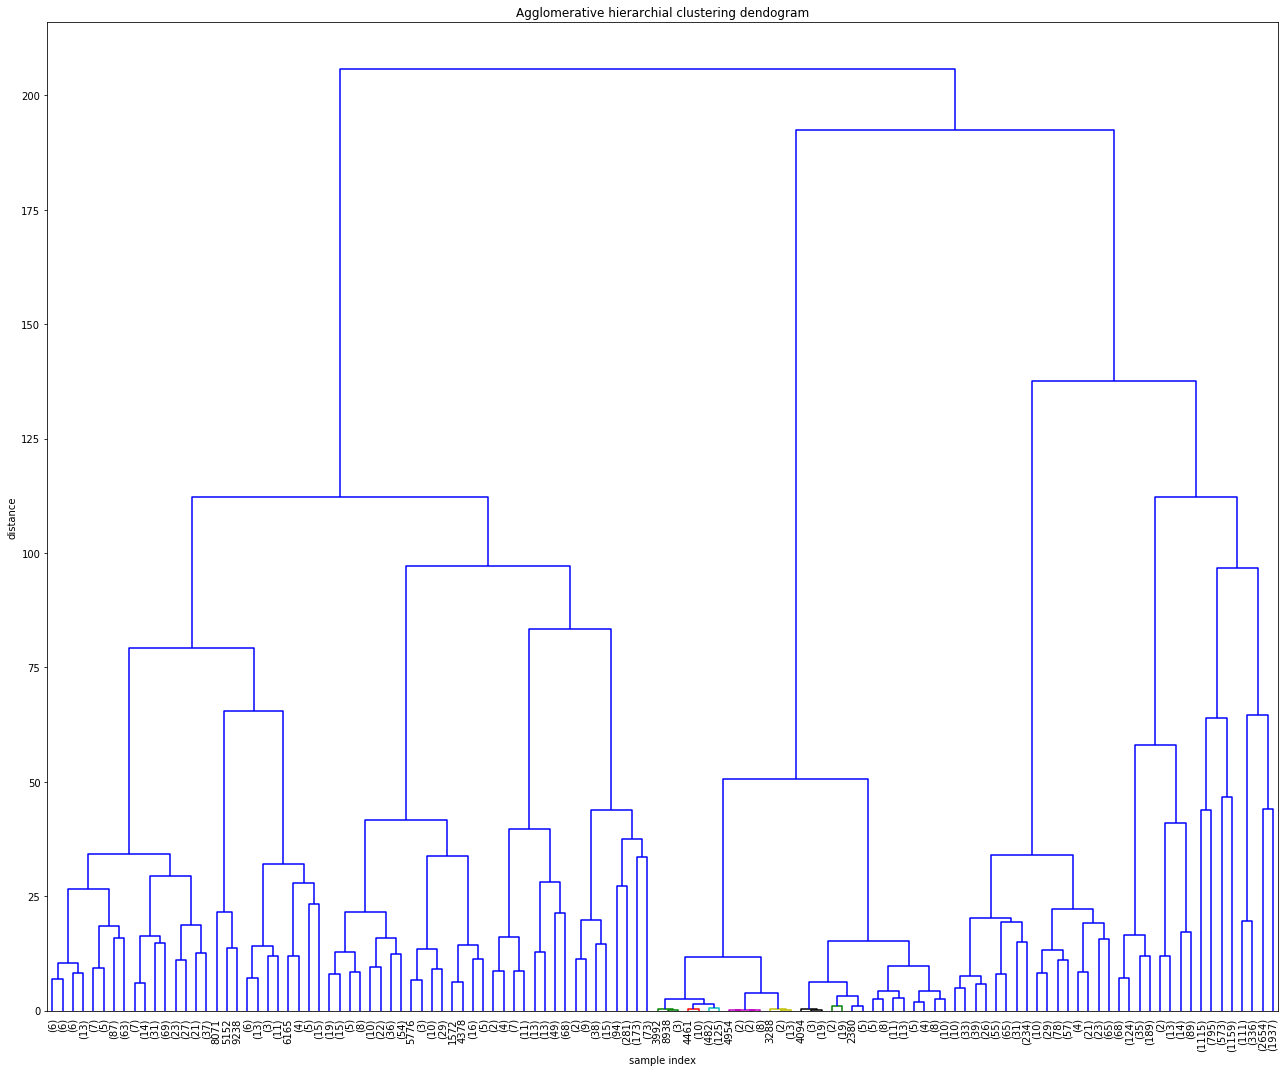

In [126]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize = (18,15))
plt.title('Agglomerative hierarchial clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(X,'ward')
dendrogram(z, p = 6, color_threshold = 1, leaf_font_size = 10 , truncate_mode = 'level')
plt.tight_layout()

Agglomerative clustering is also performing well with pca

In [127]:
#checking the clustering accuracy
df['label'] = L 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(df['Revenue'],df['label']))
print(confusion_matrix(df['Revenue'],df['label']))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      9462
           1       0.26      0.14      0.18      2868

   micro avg       0.71      0.71      0.71     12330
   macro avg       0.51      0.51      0.50     12330
weighted avg       0.65      0.71      0.67     12330

[[8293 1169]
 [2467  401]]


The agglomerative clustering with pca is performing better as it has now decreased the misclassification of both the groups

# 6.  Data Split(without pca):

In [128]:
X = df.drop(['label','Revenue'],axis = 1)
y = df['Revenue']

In [129]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1


In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [141]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3153
           1       0.22      0.05      0.09       916

   micro avg       0.74      0.74      0.74      4069
   macro avg       0.50      0.50      0.47      4069
weighted avg       0.65      0.74      0.68      4069

[[2980  866]
 [ 173   50]]


In [143]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


In [144]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [145]:
#gaussiannaive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


In [146]:
#bernaulli naive bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


All the models except for the knn is classifying the model correctly

# 7. Split train and test(With pca):


In [147]:
a = X[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

In [148]:
a = sc.fit_transform(a)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [153]:
pca = PCA(n_components = 7)
a_pca = pd.DataFrame(pca.fit_transform(a),columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
#a_pca = pd.DataFrame(a_pca, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])


In [156]:
b = X[['Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

In [160]:
#merging pca and categorical columns
X = pd.concat([a_pca, b], axis=1, sort=False)

In [161]:
X.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-3.247259,3.646599,-0.863071,-0.869317,0.620301,-0.187662,-0.122852,2,1,1,1,1,2,0
1,-1.407398,-0.055116,-0.172973,0.228185,-0.077449,-0.442986,0.184887,2,2,2,1,2,2,0
2,-3.247259,3.646599,-0.863071,-0.869317,0.620301,-0.187662,-0.122852,2,4,1,9,3,2,0
3,-1.975054,1.045856,-0.378316,-0.086245,0.118597,-0.368043,0.099968,2,3,2,2,4,2,0
4,-0.992464,-0.318079,0.043769,0.184377,0.019894,-0.523778,0.205865,2,3,3,1,4,2,1


In [163]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Revenue, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [165]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [166]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3153
           1       0.91      0.36      0.52       916

   micro avg       0.85      0.85      0.85      4069
   macro avg       0.87      0.67      0.71      4069
weighted avg       0.86      0.85      0.82      4069

[[3119  586]
 [  34  330]]


In [167]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


In [168]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [169]:
#gaussiannaive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


In [170]:
#bernaulli naive bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00       916

   micro avg       1.00      1.00      1.00      4069
   macro avg       1.00      1.00      1.00      4069
weighted avg       1.00      1.00      1.00      4069

[[3153    0]
 [   0  916]]


With pca also all the models except for knn is doing classification correctly


# 8.  Final Model:

In [175]:
print('..............Models without PCA................')
data = {'Method': ['logistic_regression', 'knn', 'decision_tree','Random_forest','GaussianNB','BernaulliNB'],'precision-micro': [1, 0.74,1,1,1,1],
       'recall-micro':[1,0.74,1,1,1,1],'f1-micro':[1,0.74,1,1,1,1]}
data = pd.DataFrame(data)
data

..............Models without PCA................


,Method,precision-micro,recall-micro,f1-micro
0,logistic_regression,1.00,1.00,1.00
1,knn,0.74,0.74,0.74
2,decision_tree,1.00,1.00,1.00
3,Random_forest,1.00,1.00,1.00
4,GaussianNB,1.00,1.00,1.00
5,BernaulliNB,1.00,1.00,1.00


In [176]:
print('..............Models with PCA................')
data = {'Method': ['logistic_regression', 'knn', 'decision_tree','Random_forest','GaussianNB','BernaulliNB'],'precision-micro': [1, 0.85,1,1,1,1],
       'recall-micro':[1,0.85,1,1,1,1],'f1-micro':[1,0.85,1,1,1,1]}
data = pd.DataFrame(data)
data

..............Models with PCA................


,Method,precision-micro,recall-micro,f1-micro
0,logistic_regression,1.00,1.00,1.00
1,knn,0.85,0.85,0.85
2,decision_tree,1.00,1.00,1.00
3,Random_forest,1.00,1.00,1.00
4,GaussianNB,1.00,1.00,1.00
5,BernaulliNB,1.00,1.00,1.00


All the models except for the knn model is giving a f1-micro score of 1 so we can apply any one of the models and also the f1 score of knn with pca has also improved.